In [6]:
import pandas as pd
import sys
import glob
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("/home/bruce1996/data/Yi-Fung-Chuang/")

### Taxonomy profile pre-processing

In [18]:
probiotics = ["Bifidobacterium animalis","Bifidobacterium bifidum","Clostridium butyricum","Lactobacillus acidophilus",
               "Lactobacillus casei","Lactobacillus gasseri","Lactobacillus johnsonii","Lactobacillus paracasei",
               "Lactobacillus plantarum","Lactobacillus reuteri","Lactobacillus rhamnosus","Clostridium butyricum"]
genus = [x.split(' ')[0] for x in probiotics]
genus = list(set(genus))

In [4]:
path = '/home/bruce1996/data/Yi-Fung-Chuang/within_individual/emu_output/'
file_list = glob.glob(path +"*tsv")
file_list.sort()
for idx,file in enumerate(file_list) :
    _,filename = os.path.split(file)
    sample_name = filename.split('_')[1] + '_' + filename.split('_')[2]
    df = pd.read_csv(file,sep = '\t')
    #only extract abundance & species columns
    df = df.iloc[:,0:2]
    df.columns = [sample_name,'species']
    if idx == 0 :
        merge_df = df
    else :
        merge_df = pd.merge(merge_df,df,how = 'outer',on = 'species')
merge_df = merge_df.fillna(0)
idx = [1,0] + [x for x in range(2,merge_df.shape[1])]
merge_df = merge_df.iloc[:,idx]
merge_df.index = merge_df['species']


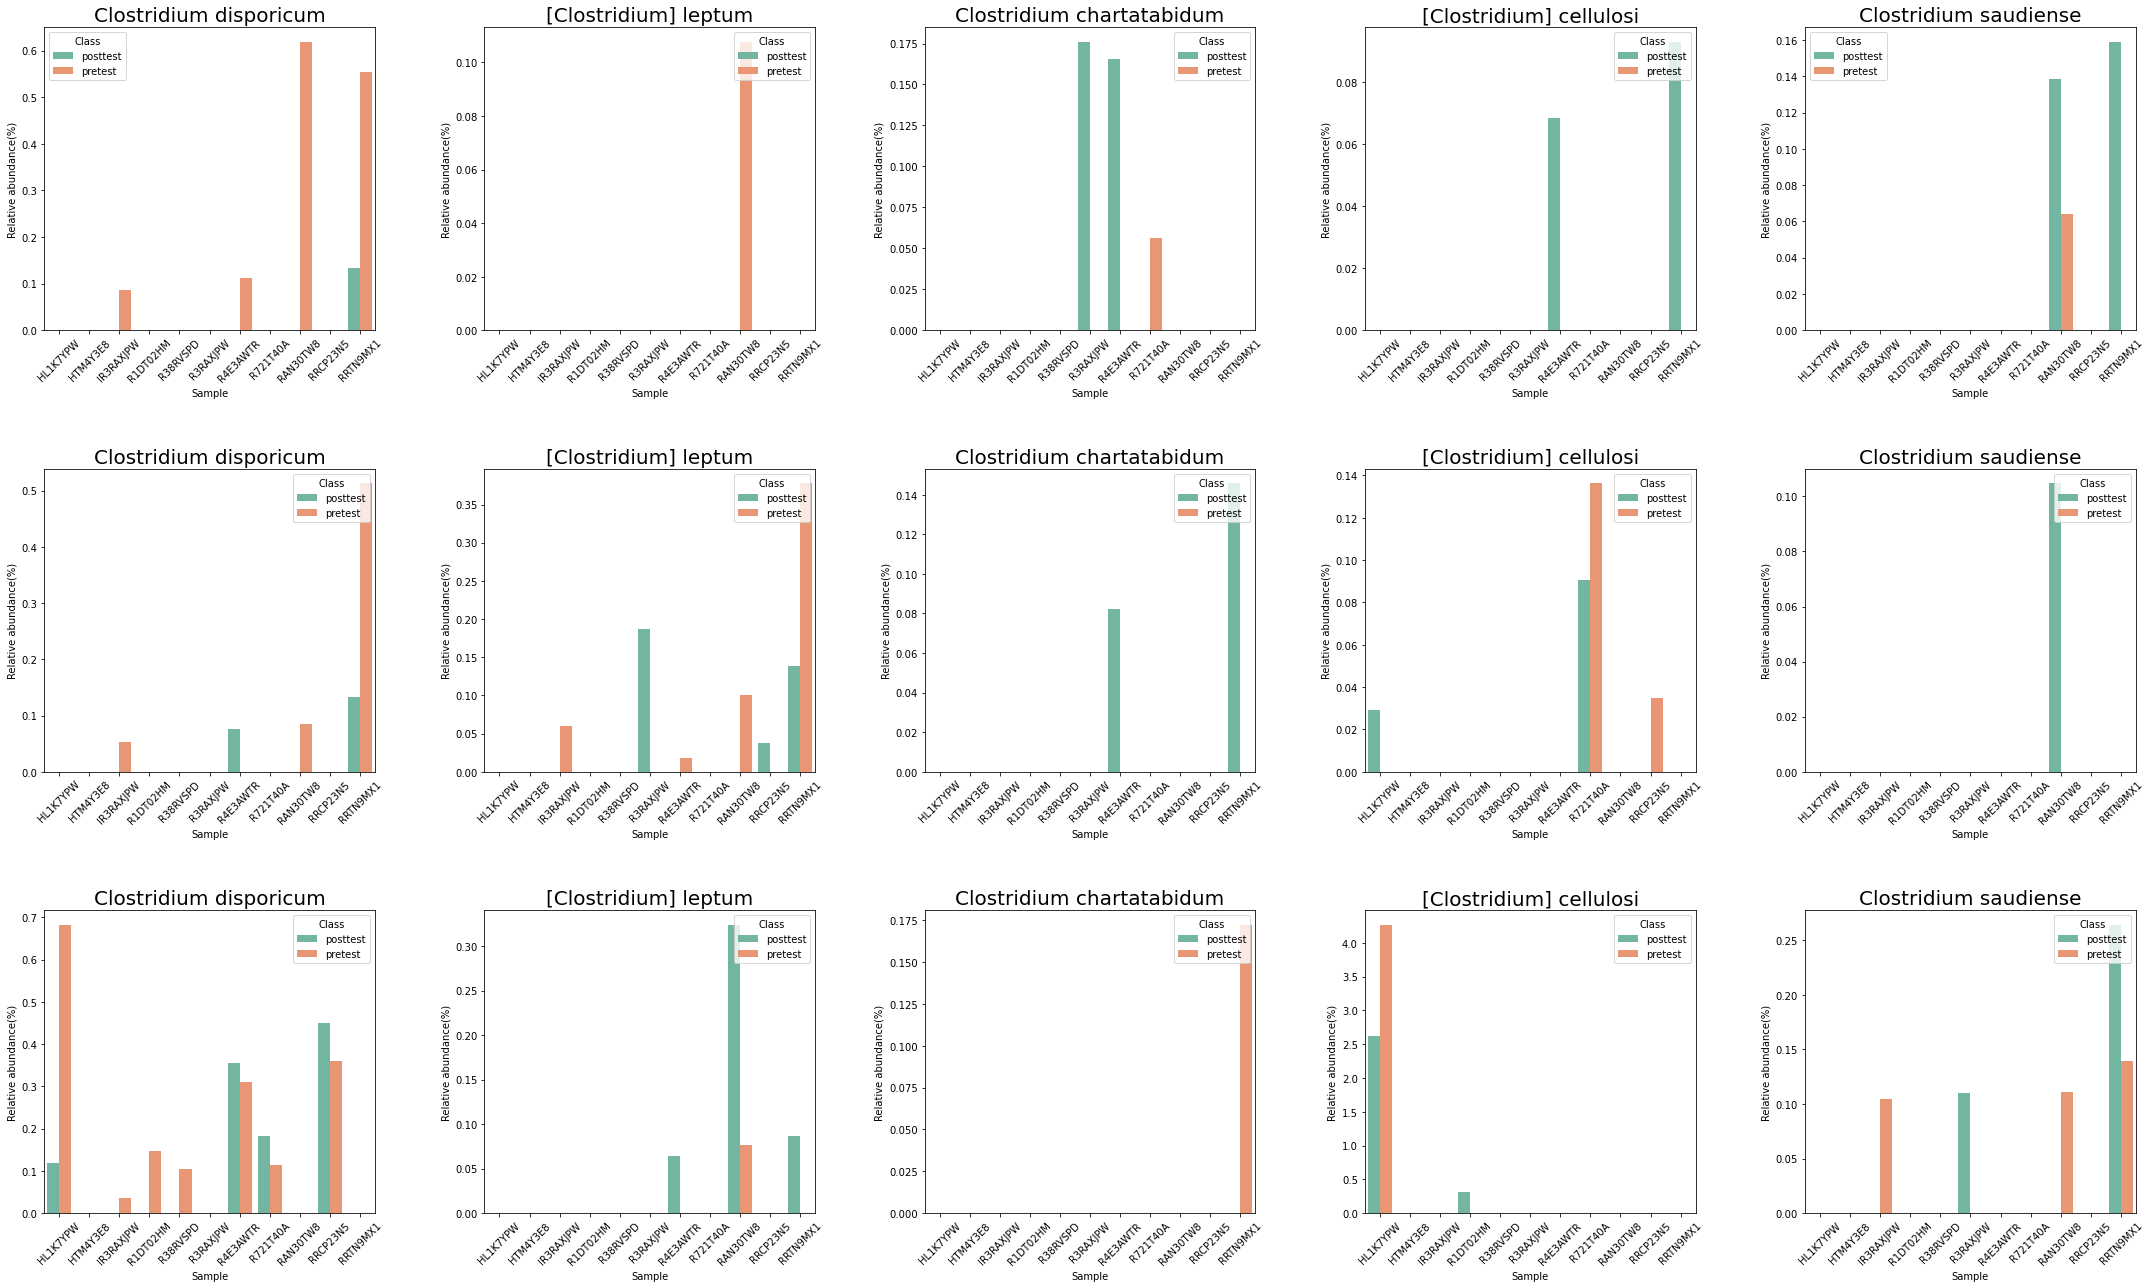

In [39]:
probiotics_index = [bool(re.search(genus[1],x)) for x in merge_df['species']] 
probiotics_df = merge_df.loc[probiotics_index,:]
probiotics_df = probiotics_df.melt(id_vars='species')
probiotics_df.columns = ['Species','Sample','Abundance']
sample = [x.split('_')[0] for x in probiotics_df['Sample']]
label = [x.split('_')[1] for x in probiotics_df['Sample']]
probiotics_df['Sample'] = sample
probiotics_df['Class'] = label
#convert to percentage
probiotics_df['Abundance'] = probiotics_df['Abundance'] * 100
sp = list(set(probiotics_df['Species']))

fig,axs = plt.subplots(3,5,figsize = (30,18),squeeze = False)
for r in range(3):
    for c in range(5):
        df = probiotics_df.loc[probiotics_df['Species'] == sp[r*5+c-1],:]
        sns.barplot(x='Sample',y='Abundance',hue='Class',data=df,palette="Set2",ax = axs[r][c])
        axs[r][c].set_xticklabels(axs[r][c].get_xticklabels(),rotation = 45)
        axs[r][c].set_ylabel('Relative abundance(%)')
        axs[r][c].set_title(sp[c],fontsize = 20)

output_path = '/home/bruce1996/data/Yi-Fung-Chuang/within_individual/tmp/'
dir_exist = os.path.exists(output_path)
if not dir_exist :
    os.makedirs(output_path)
filename = 'Within_individual_test_of_' + genus[1] + '.png'
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig(output_path + filename,dpi = 300,bbox_inches = "tight")